[0, 0.01]

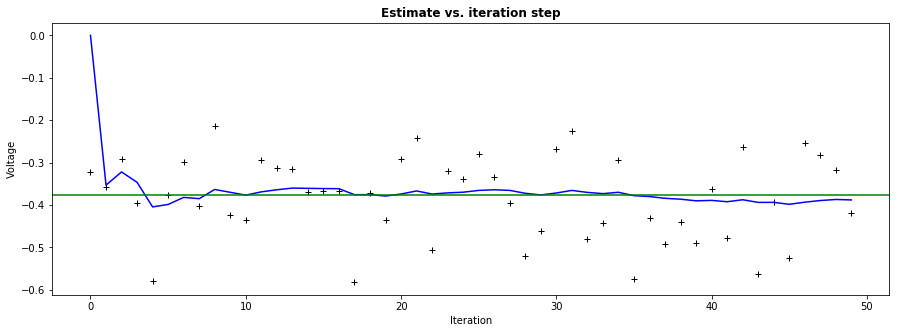

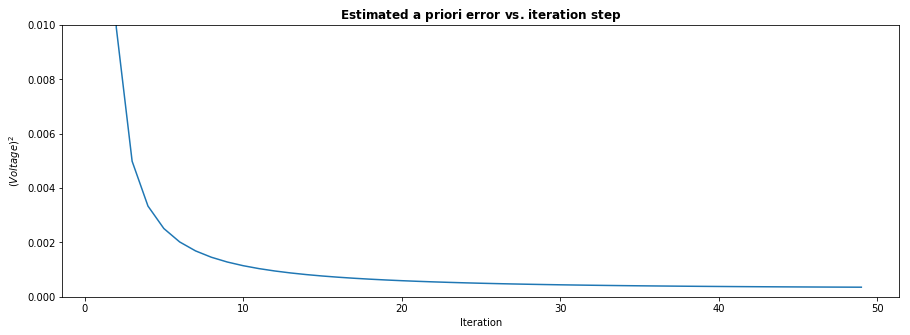

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 15,5


proc_var = 1e-5 # Process variance 
n_obs = 50 # Number of measurements

x = -0.37727 # True x-value

z = np.random.normal(true_x, 0.1, size = n_obs) # Noisy measurements - std deviation of 0.1 about x

# Allocate space for arrays

xhat = np.zeros(n_obs)      # posterior estimate of state x
P = np.zeros(n_obs)         # posterior error covariance estimate
xhatminus = np.zeros(n_obs) # prior state estimate
Pminus = np.zeros(n_obs)    # prior error covariance estimate
K = np.zeros(n_obs)         # Kalman gain

R = 0.1**2                  # estimate of measurement variance

# Initial Guesses

xhat[0] = 0.0
P[0] = 1.0


for k in range(1,n_obs):
    
    # Step 1: Prediction (Time Update) - project system from time step k-1 to k
    
    xhatminus[k] = xhat[k-1] # The expected value of the current state, is the previous actual state
    Pminus[k] = P[k-1] + proc_var # The predicted covariance is the sum of the previous covariance and process
    
    # Step 2: Measurement (Correction Update) - measure the system and correct the predictions
    
    K[k] = Pminus[k]/(Pminus[k] + R)
    xhat[k] = xhatminus[k] + K[k]*(z[k] - xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]
    
# Plot the process
    
# plt.figure()
plt.plot(z,'k+',label='noisy measurements') # Plot the measurements
plt.plot(xhat,'b-',label='a posteri estimate') # Plot the posterior estimate
plt.axhline(x,color='g',label='truth value') # Plot a line showing the true X value

# plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Voltage')


plt.figure()
valid_iter = range(1,n_obs) # Pminus not valid at step 0
plt.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate') # Plot the prior estimate variance
plt.title('Estimated $\it{\mathbf{a \ priori}}$ error vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('$(Voltage)^2$')
plt.setp(plt.gca(),'ylim',[0,.01]) # 
